In [ ]:
"""
Domain
    Automotive

focus
    Incentivize drivers

Business challenge/requirement
    Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It 
    provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically 
    for a day and then replace it with a charged battery from the company. 
    Lithionpower has a variable pricing model based on the driver's driving history. As 
    the life of a battery depends on factors such as overspeeding, distance driving per 
    day, etc.
    You as an ML expert have to create a cluster model where drivers can be grouped 
    based on the driving data.

Key issues
    Drivers will be incentivized based on the cluster, so grouping has to be accurate 

Considerations
    NONE

Data volume
    - 4000 records – file driver-data.csv

Fields in Data
    • id: Unique Id of the driver 
    • mean_dist_day: Mean distance driven by driver per day
    • mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over 
        the speed limit

Additional information
    - NA

Business benefits
    Increase in profits, up to 15-20% as drivers with poor history will be charged more

"""

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
CSV_PATH = r'D:\CourseWork\data-science-python-certification-course\Assignments\10 Unsupervised Learning\Case Study I\resources\driver-data.csv'
df = pd.read_csv(CSV_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [19]:
km = KMeans(n_clusters=4)
km.fit(df)
df['cluster'] = km.labels_
print(km.cluster_centers_)
print("Inertia:", km.inertia_)

c:\Users\Vishv\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[3.42331293e+09 7.35703770e+01 1.06716270e+01 9.60317460e-01]
 [3.42331193e+09 7.80401805e+01 1.10381143e+01 6.21865597e-02]
 [3.42331394e+09 7.52317984e+01 1.10306324e+01 2.94664032e+00]
 [3.42331094e+09 7.73820041e+01 1.01312309e+01 2.00000000e+00]]
Inertia: 345611690.6191286


In [8]:
cluster, counts = np.unique(km.labels_, return_counts=True)
data = dict(zip(cluster, counts))
print(data)

{0: 1006, 1: 995, 2: 1014, 3: 985}


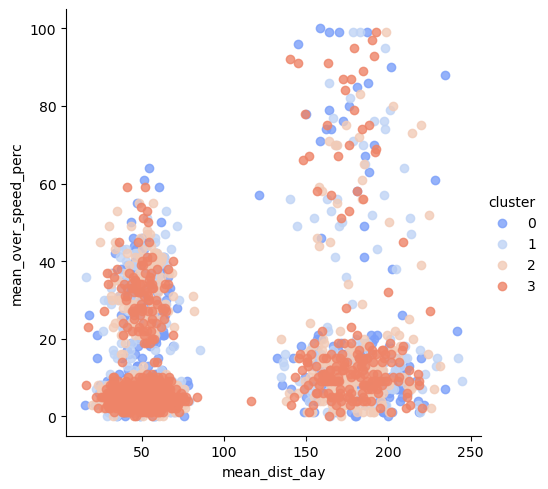

In [17]:
df["cluster"] = km.labels_
sns.lmplot(data=df, x='mean_dist_day', y='mean_over_speed_perc', hue='cluster', fit_reg=False, palette='coolwarm')

In [22]:
df.value_counts('cluster', sort=True)

cluster
2    1011
0    1006
1     996
3     987
dtype: int64